<a href="https://colab.research.google.com/github/Phanttan/DeepLearning-Miscellanious/blob/main/Visualizing_intermediate_convnet_vgg16_outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from keras.applications import VGG16
from keras import models
from google.colab import drive
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



# Loading Data


In [2]:
drive.mount('/content/drive/', force_remount=False)

Mounted at /content/drive/


In [3]:
img_path = '/content/drive/My Drive/Colab Notebooks/datasets/cats_dogs_small/train/cats/cat.1.jpg'

In [4]:
img = image.load_img(img_path,target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor.shape

(224, 224, 3)

In [5]:
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape

(1, 224, 224, 3)

In [6]:
img_tensor /= img_tensor.max()

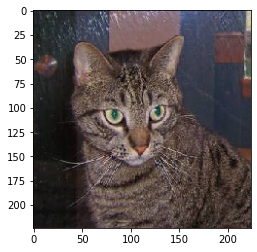

In [7]:
plt.imshow(img_tensor[0])
plt.show()

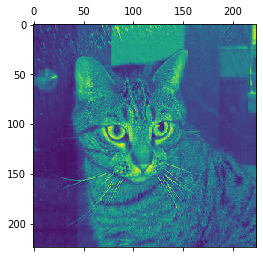

In [8]:
plt.matshow(img_tensor[0,:,:,0])

# Call a training model (VGG16)

In [9]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
model.layers

In [58]:
len(model.layers)

23

In [ ]:
model.get_layer(index=0)

In [88]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print("The {} has filter with dimension : {}".format(layer.name, filters.shape))

The block1_conv1 has filter with dimension : (3, 3, 3, 64)
The block1_conv2 has filter with dimension : (3, 3, 64, 64)
The block2_conv1 has filter with dimension : (3, 3, 64, 128)
The block2_conv2 has filter with dimension : (3, 3, 128, 128)
The block3_conv1 has filter with dimension : (3, 3, 128, 256)
The block3_conv2 has filter with dimension : (3, 3, 256, 256)
The block3_conv3 has filter with dimension : (3, 3, 256, 256)
The block4_conv1 has filter with dimension : (3, 3, 256, 512)
The block4_conv2 has filter with dimension : (3, 3, 512, 512)
The block4_conv3 has filter with dimension : (3, 3, 512, 512)
The block5_conv1 has filter with dimension : (3, 3, 512, 512)
The block5_conv2 has filter with dimension : (3, 3, 512, 512)
The block5_conv3 has filter with dimension : (3, 3, 512, 512)


In [ ]:
for layer in model.layers:
  if 'block1_conv1' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(filters[0][0][0])

[ 0.42947057  0.11727387  0.03401296  0.35422093 -0.0865837   0.22968295
  0.06683242  0.04133838  0.13026784  0.03291035  0.09615457 -0.09222532
 -0.15587331  0.0522968  -0.08324417  0.15728769  0.0291196   0.05094835
  0.19055748 -0.04372229  0.3618031   0.23902874  0.16667192 -0.18046746
  0.04404821  0.09592837 -0.04381131 -0.1884835  -0.04399502 -0.18985446
 -0.23386982  0.12836744 -0.11059975  0.00571336 -0.24479656 -0.30530283
  0.060938   -0.32816252  0.1711953   0.10265407 -0.11063665  0.33012986
 -0.05869728  0.18478717  0.01050853  0.10668027 -0.13086924 -0.36283946
  0.06440807  0.09335972  0.00401619  0.37814805  0.05268804 -0.27078936
  0.11060741 -0.11819526  0.04298935  0.35323623 -0.28468162 -0.20289008
 -0.284944   -0.13224158 -0.05334752  0.00757738]


In [10]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28, 512) dtype=float32>,
 <tf.Tensor 'block4_conv2/Relu:0' shape=(None, 28, 28, 512) dtype=float32>,
 <tf.Tens

In [11]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model

In [85]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 224, 224, 3)

In [87]:
for ind in range(len(activations)):
  activation = activations[ind]
  print(activation.shape)

(1, 224, 224, 3)
(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 4096)
(1, 4096)
(1, 1000)


# Visualizating the activations

In [53]:
def plot_layer(activation, i_layer):
  #fig, a = plt.subplots(1,3)
  layer_activation = activation[i_layer]
  plt.figure()
  #for i in range(3):
    #plt.subplot(1,3,i)
  plt.matshow(layer_activation[0,:,:,0], cmap='viridis', fignum=1)
  plt.matshow(layer_activation[0,:,:,1], cmap='viridis', fignum=2)
  plt.matshow(layer_activation[0,:,:,2], cmap='viridis', fignum=3)

In [ ]:
plot_layer(activations, 0)

In [49]:
def plot_layer1(activation, i_layer):
  plt.figure()
  layer_activation = activation[i_layer]
  for i in range(3):
    plt.subplot(1, 3, i+1)
    data = layer_activation[0,:,:,i]
    plt.imshow(data)

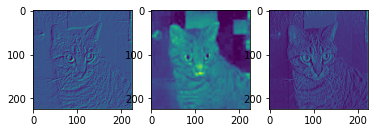

In [92]:
plot_layer1(activations, 1)